In [22]:
import csv
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.facecolor'] = "w"

In [108]:
def load_data_from_loadshape_file(filename):
    df = pd.read_csv(filename)
    df.index = df.iloc[:,1] # drop unnamed first column
    df = df.dropna() # drop rows with nan
    df = df.iloc[:,2:] # make row_key (premise_id) 
    return df

def check_for_null(df):
    return df.isnull().values.any()
    
file_name = "summer_loadcurves.csv" 
summer = load_data_from_loadshape_file(file_name)
check_for_null(summer)

False

In [120]:
summer.index

Float64Index([10029454.0, 30003387.0, 30014789.0, 30019547.0, 30019713.0,
              30019739.0, 30020002.0, 30028198.0, 30033215.0, 30040348.0,
              ...
              31602288.0, 31602299.0, 31602316.0, 31602721.0, 31602787.0,
              31606284.0, 31617166.0, 31617207.0, 31617361.0, 31617384.0],
             dtype='float64', name='0', length=82705)

In [147]:
summarize = summer.T.describe().T
summarize

,count,mean,std,min,25%,50%,75%,max
row_key,,,,,,,,
10029454.0,24.0,0.925911,0.402800,0.433161,0.573645,0.843742,1.150952,1.890387
30003387.0,24.0,2.328120,0.542826,1.556548,1.809371,2.387758,2.858927,3.101419
30014789.0,24.0,0.765429,0.249910,0.522355,0.581669,0.629694,0.892089,1.285355
30019547.0,24.0,0.911484,0.503583,0.421742,0.481621,0.732871,1.166540,1.970774
30019713.0,24.0,1.184952,0.507832,0.490774,0.638935,1.236871,1.680887,1.816742
...,...,...,...,...,...,...,...,...
31606284.0,24.0,0.321007,0.192217,0.099500,0.232000,0.276250,0.341500,0.813333
31617166.0,24.0,0.854474,0.527185,0.267806,0.370161,0.761452,1.341347,1.914581
31617207.0,24.0,1.021671,0.718899,0.244000,0.356645,0.730871,1.708427,2.232968


In [112]:
def min_max_scaling(df):
    df = df.T 
    min_max_scaler = preprocessing.MinMaxScaler()
    return pd.DataFrame(min_max_scaler.fit_transform(df))

scaled_df= min_max_scaling(summer)
scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,82695,82696,82697,82698,82699,82700,82701,82702,82703,82704
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.338143,0.499441,0.318577,0.316160,0.523525,0.583919,0.455872,0.451624,0.480492,0.356843,...,0.253343,0.337948,0.514848,0.394025,0.430276,0.310306,0.356253,0.390992,0.379618,0.459957
std,0.276416,0.351373,0.327537,0.325095,0.382990,0.355053,0.330030,0.394802,0.287696,0.324896,...,0.225110,0.257094,0.279044,0.331847,0.267962,0.269275,0.320132,0.361443,0.457908,0.265488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.096405,0.163653,0.077739,0.038656,0.111738,0.262135,0.116198,0.082628,0.280428,0.116489,...,0.113577,0.191955,0.323380,0.039688,0.173299,0.185618,0.062155,0.056635,0.001296,0.299583
50%,0.281755,0.538045,0.140680,0.200854,0.562681,0.668177,0.555692,0.342015,0.472368,0.212193,...,0.168643,0.316658,0.541021,0.397174,0.509955,0.247607,0.299765,0.244786,0.042879,0.458418
75%,0.492573,0.843034,0.484579,0.480815,0.897543,0.915479,0.733758,0.883280,0.710409,0.471075,...,0.402817,0.380628,0.707238,0.661302,0.602887,0.339015,0.651905,0.736275,0.983158,0.612924
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
scaled_df = scaled_df.T
scaled_df.index = summer.index
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,,,,,,,,,,,
10029454.0,0.194847,0.057112,0.000000,0.001594,0.099659,0.270908,0.182317,0.086643,0.044185,0.078585,...,0.384292,0.345863,0.475096,0.625493,0.610041,0.757825,1.000000,0.844380,0.492673,0.288396
30003387.0,0.101230,0.004677,0.000000,0.018396,0.114197,0.045729,0.180138,0.337579,0.471968,0.518427,...,0.875718,0.883506,0.944791,0.862813,0.776284,0.598380,0.649558,0.557662,0.327180,0.184189
30014789.0,0.097958,0.072633,0.090771,0.027946,0.000000,0.097747,0.141885,0.056779,0.030821,0.079440,...,0.359405,0.481715,0.493172,0.805310,1.000000,0.950577,0.946011,0.646007,0.423160,0.139475
30019547.0,0.008996,0.012557,0.011349,0.000000,0.000250,0.047355,0.074552,0.191649,0.186006,0.210058,...,0.753790,1.000000,0.979654,0.841129,0.644481,0.409475,0.291274,0.185818,0.057788,0.011537
30019713.0,0.100718,0.093468,0.064980,0.000000,0.028366,0.092860,0.115412,0.277436,0.396764,0.479236,...,0.928695,0.750955,0.890962,1.000000,0.848486,0.974845,0.917285,0.646126,0.269432,0.145797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31606284.0,0.247957,0.247257,0.247957,0.233948,0.228345,0.383143,0.157600,0.009106,0.025916,0.011207,...,0.225776,0.241186,0.911744,0.578333,0.717488,1.000000,0.564791,0.321037,0.194957,0.294420
31617166.0,0.021234,0.037630,0.056043,0.126268,0.000000,0.041841,0.064192,0.102899,0.094378,0.315514,...,0.736454,1.000000,0.586445,0.638883,0.438217,0.377924,0.493712,0.284016,0.092595,0.034241
31617207.0,0.122174,0.064241,0.033816,0.028755,0.008012,0.000000,0.000341,0.026631,0.114130,0.194265,...,1.000000,0.715933,0.825440,0.950274,0.769422,0.626066,0.344059,0.213565,0.193389,0.276006


In [135]:
## for plotting
x_axis = pd.date_range("2019-1-1", periods=24, freq="1h").strftime("%H:%M")

weekday_names = ["Mon", "Tue", "Wen", "Thu", "Fri", "Sat", "Sun"]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]
quarter_names = ["Q1-weekday","Q2-weekday",  "Q3-weekday", "Q4-weekday","Q1-weekend", "Q2-weekend","Q3-weekend",  "Q4-weekend"]   

def plot_cluster_centroids(df, clust, lw=4, alpha=0.6):
    """
    DESCRIPTION: Plots cluster centroids.
    """
    
    weekly = True if df.shape[1] == 168 else False
    monthly = True if df.shape[1] == 288 else False 
    quarterly = True if df.shape[1] == 192 else False
    if weekly:
        figsize = [15, 4] 
    elif monthly:
        figsize = [25, 4] 
    elif quarterly:
        figsize = [20, 4]
    else:
        figsize = [8, 6]
    
    fontsize = 15
    fig = plt.figure(figsize=figsize)
    
    df.assign(clust=clust).groupby("clust").mean().T.plot(ax=plt.gca(), lw=lw, alpha=alpha);

    plt.title("Cluster Centroids", fontsize=fontsize+5);
    plt.xticks(np.arange(0, len(x_axis), 4), x_axis[::4], fontsize=fontsize);
    
    if weekly:
        plt.xticks(np.arange(0, df.shape[1], 24), 
                   weekday_names, 
                   fontsize=fontsize);
        xposition = np.arange(0, df.shape[1], 24)
        for xc in xposition:
            plt.axvline(x=xc, color='tab:gray', linestyle='--')
    if monthly:
        plt.xticks(np.arange(0, df.shape[1], 24), 
                   month_names, 
                   fontsize=fontsize);
        xposition = np.arange(0, df.shape[1], 24)
        for xc in xposition:
            plt.axvline(x=xc, color='tab:gray', linestyle='--')
    if quarterly:
        plt.xticks(np.arange(0, df.shape[1], 24), 
                   quarter_names, 
                   fontsize=fontsize);
        xposition = np.arange(0, df.shape[1], 24)
        for xc in xposition:
            plt.axvline(x=xc, color='tab:gray', linestyle='--')
    
    plt.yticks(fontsize=fontsize);
    plt.xlabel("")
    plt.ylabel("$P/P_{max}$", fontsize=fontsize)
    plt.legend(title="Cluster centroids:", loc="upper left")
    plt.grid()


def plot_clustered_profiles(df, clust, n_cols=3, alpha=0.2):
    """
    DESCRIPTION: Plots one subplot per cluster, where each subplot contains
                    all profiles in a particular cluster together with a cluster centroid.
    """
    
    weekly = True if df.shape[1] == 168 else False
    monthly = True if df.shape[1] == 288 else False 
    quarterly = True if df.shape[1] == 192 else False

    clust_perc = 100 * clust.value_counts(normalize=True)

    n_rows = np.ceil(clust.nunique() / n_cols)
    
    fontsize = 15

    fig = plt.figure(figsize=[20, n_rows*4])

    for i, clust_n in enumerate(clust_perc.index):

        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df_plot = df[clust == clust_n]
        
        step = 10 if df_plot.shape[0] > 500 else 1  # plot less profiles

        plt.plot(df_plot.iloc[::step].T.values, alpha=alpha, color="dodgerblue")
        df_plot.mean().plot(ax=plt.gca(), alpha=1, color="k", legend=False);

        plt.title("clust: {}, perc: {:.1f}%".format(clust_n, 
                                                    clust_perc.loc[clust_n]), 
                                                    fontsize=fontsize+5);
        plt.xticks(np.arange(0, len(x_axis), 4), x_axis[::4], fontsize=12);

        if weekly:
            plt.xticks(np.arange(0, df.shape[1], 24), 
                       weekday_names, 
                       fontsize=fontsize);
            xposition = np.arange(0, df.shape[1], 24)
            for xc in xposition:
                plt.axvline(x=xc, color='tab:gray', linestyle='--')
        if monthly:
            plt.xticks(np.arange(0, df.shape[1], 24), 
                       month_names, 
                       fontsize=fontsize);
            xposition = np.arange(0, df.shape[1], 24)
            for xc in xposition:
                plt.axvline(x=xc, color='tab:gray', linestyle='--')
        if quarterly:
            plt.xticks(np.arange(0, df.shape[1], 24), 
                       quarter_names, 
                       fontsize=fontsize);
            xposition = np.arange(0, df.shape[1], 24)
            for xc in xposition:
                plt.axvline(x=xc, color='tab:gray', linestyle='--')
        
        plt.yticks(fontsize=fontsize);

        plt.xlabel("Hours", fontsize=fontsize)
        plt.ylabel("$P/P_{max}$", fontsize=fontsize)
        plt.grid()
        plt.savefig('cluster.png')

    plt.tight_layout()

# Clustering results

In [131]:
def plot_cost_vs_clusters(df, cluster_algorithm,max_clusters,dtw_metric="dtw"):
    """
    DESCRIPTION: Fits KMeans for different number of clusters & plots cost depending on a number of clusters.
    """
    inertias = []

    for n_clusters in range(2, max_clusters+1):
        if cluster_algorithm == KMeans:
            model = KMeans(n_clusters).fit(df)
        elif cluster_algorithm == TimeSeriesKMeans:
            model = TimeSeriesKMeans(n_clusters,metric = dtw_metric).fit(df) 
        inertias.append(model.inertia_)

    inertias = pd.Series(inertias, index=list(range(2, max_clusters+1)))
    inertias.plot(grid=True);
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")

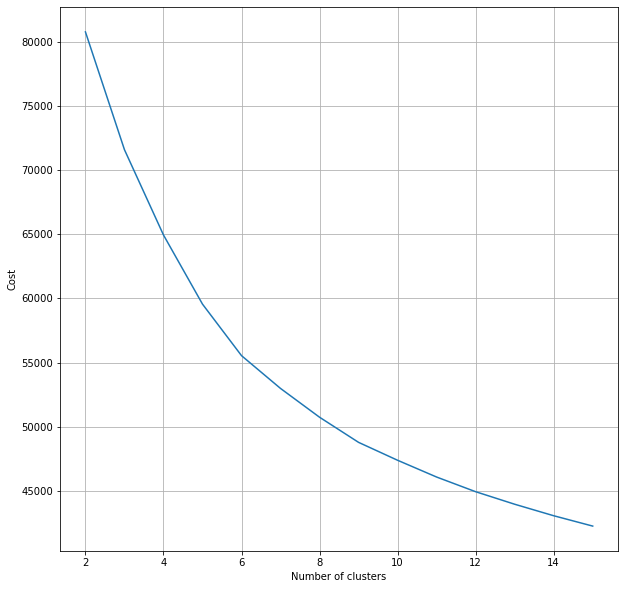

In [132]:
## Determine the number of clusters
plt.rcParams['figure.figsize'] = [10, 10]
plot_cost_vs_clusters(scaled_df,KMeans, max_clusters=15)

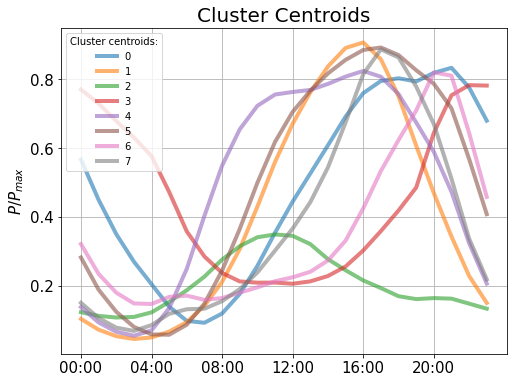

In [133]:
n_clusters = 8

algorithm = KMeans
model = algorithm(n_clusters).fit(scaled_df)
clust = pd.Series(model.labels_, index=scaled_df.index)
plot_cluster_centroids(scaled_df, clust)

<ipython-input-135-e68f626d9230>:82: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(n_rows, n_cols, i+1)
<ipython-input-135-e68f626d9230>:82: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(n_rows, n_cols, i+1)
<ipython-input-135-e68f626d9230>:82: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(n_rows, n_cols, i+1)
<ipython-input-135-e68f626d9230>:82: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(n_rows, n_cols, i+1)
<ipython-input-135-e68f626d9230>

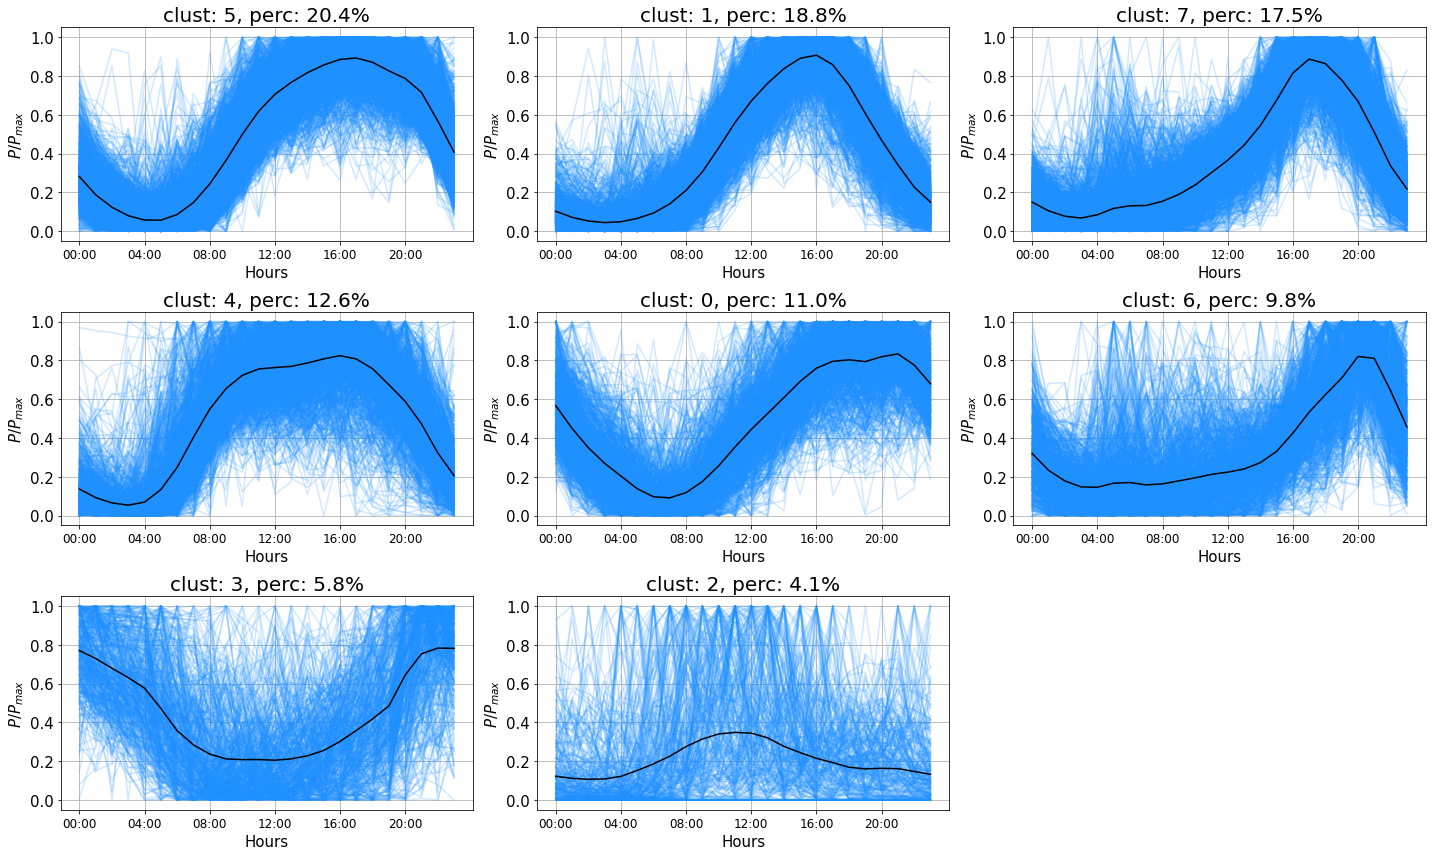

In [136]:
plot_clustered_profiles(scaled_df, clust)

In [137]:
clust

0
10029454.0    6
30003387.0    4
30014789.0    7
30019547.0    1
30019713.0    4
             ..
31606284.0    7
31617166.0    1
31617207.0    1
31617361.0    3
31617384.0    0
Length: 82705, dtype: int32

In [141]:
cluster_allocation = pd.DataFrame(clust)
cluster_allocation.columns = ['cluster']
cluster_allocation.index.name = 'row_key'
cluster_allocation

,cluster
row_key,
10029454.0,6
30003387.0,4
30014789.0,7
30019547.0,1
30019713.0,4
...,...
31606284.0,7
31617166.0,1
31617207.0,1


In [142]:
cluster_allocation.to_csv('15032022_clustering_result_summer.csv')

In [149]:
pd.merge(cluster_allocation,summarize, how = 'inner', on = "row_key")

,cluster,count,mean,std,min,25%,50%,75%,max
row_key,,,,,,,,,
10029454.0,6,24.0,0.925911,0.402800,0.433161,0.573645,0.843742,1.150952,1.890387
30003387.0,4,24.0,2.328120,0.542826,1.556548,1.809371,2.387758,2.858927,3.101419
30014789.0,7,24.0,0.765429,0.249910,0.522355,0.581669,0.629694,0.892089,1.285355
30019547.0,1,24.0,0.911484,0.503583,0.421742,0.481621,0.732871,1.166540,1.970774
30019713.0,4,24.0,1.184952,0.507832,0.490774,0.638935,1.236871,1.680887,1.816742
...,...,...,...,...,...,...,...,...,...
31606284.0,7,24.0,0.321007,0.192217,0.099500,0.232000,0.276250,0.341500,0.813333
31617166.0,1,24.0,0.854474,0.527185,0.267806,0.370161,0.761452,1.341347,1.914581
31617207.0,1,24.0,1.021671,0.718899,0.244000,0.356645,0.730871,1.708427,2.232968


In [150]:
joined = pd.merge(cluster_allocation,summarize, 
                  how = 'inner', on = "row_key").drop(columns=["count"])
joined

,cluster,mean,std,min,25%,50%,75%,max
row_key,,,,,,,,
10029454.0,6,0.925911,0.402800,0.433161,0.573645,0.843742,1.150952,1.890387
30003387.0,4,2.328120,0.542826,1.556548,1.809371,2.387758,2.858927,3.101419
30014789.0,7,0.765429,0.249910,0.522355,0.581669,0.629694,0.892089,1.285355
30019547.0,1,0.911484,0.503583,0.421742,0.481621,0.732871,1.166540,1.970774
30019713.0,4,1.184952,0.507832,0.490774,0.638935,1.236871,1.680887,1.816742
...,...,...,...,...,...,...,...,...
31606284.0,7,0.321007,0.192217,0.099500,0.232000,0.276250,0.341500,0.813333
31617166.0,1,0.854474,0.527185,0.267806,0.370161,0.761452,1.341347,1.914581
31617207.0,1,1.021671,0.718899,0.244000,0.356645,0.730871,1.708427,2.232968


In [1]:
joined.to_csv("15032022_cluster_assignment_to_consumers_dataset.csv")

NameError: name 'joined' is not defined

In [3]:
joined = pd.read_csv("15032022_cluster_assignment_to_consumers_dataset.csv")
joined

,row_key,cluster,mean,std,min,25%,50%,75%,max
0,10029454.0,6,0.925911,0.402800,0.433161,0.573645,0.843742,1.150952,1.890387
1,30003387.0,4,2.328120,0.542826,1.556548,1.809371,2.387758,2.858927,3.101419
2,30014789.0,7,0.765429,0.249910,0.522355,0.581669,0.629694,0.892089,1.285355
3,30019547.0,1,0.911484,0.503583,0.421742,0.481621,0.732871,1.166540,1.970774
4,30019713.0,4,1.184952,0.507832,0.490774,0.638935,1.236871,1.680887,1.816742
...,...,...,...,...,...,...,...,...,...
82700,31606284.0,7,0.321007,0.192217,0.099500,0.232000,0.276250,0.341500,0.813333
82701,31617166.0,1,0.854474,0.527185,0.267806,0.370161,0.761452,1.341347,1.914581
82702,31617207.0,1,1.021671,0.718899,0.244000,0.356645,0.730871,1.708427,2.232968
82703,31617361.0,3,0.084996,0.088361,0.011742,0.011992,0.020016,0.201460,0.204710


In [4]:
xx= np.arange(10)

In [5]:
["cluster_"+str(i) for i in range(10)]

['cluster_0',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6',
 'cluster_7',
 'cluster_8',
 'cluster_9']

C:\Users\54651\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


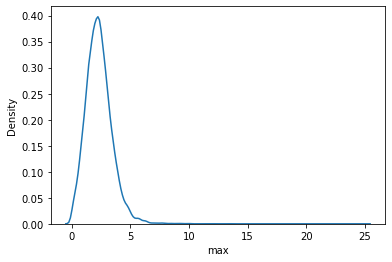

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# importing diamond dataset from the library
data = joined[joined.cluster == 1]
 
# plotting density plot for carat using distplot()
sns.distplot(a=data["max"], hist=False)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

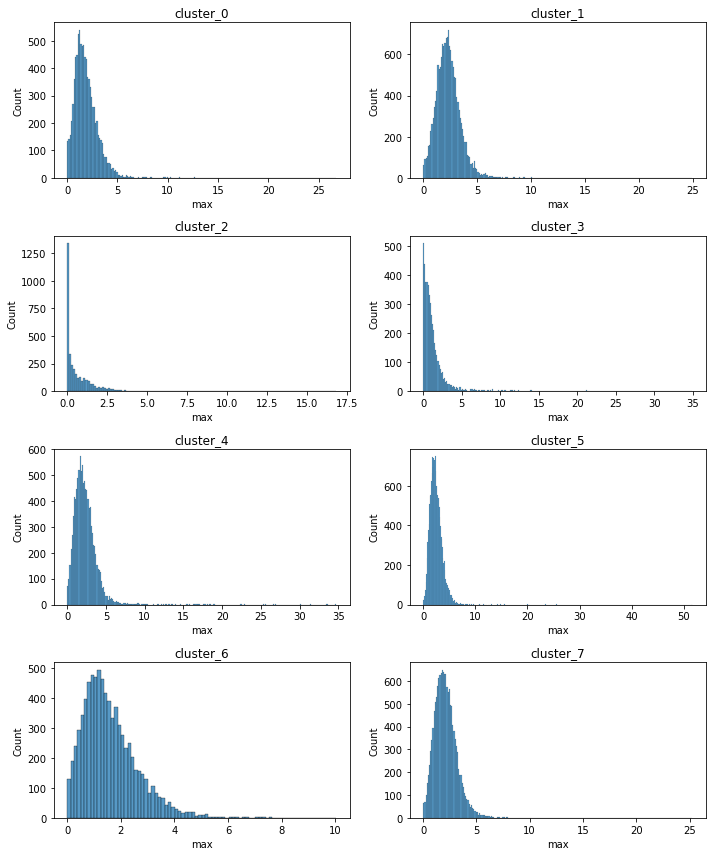

In [39]:
xaxes = ['peak_kw']
yaxes = ['frequency']
titles = ["cluster_"+str(i) for i in range(8)]
n= np.arange(8)

f,ax = plt.subplots(4,2)
f.set_size_inches(10, 12)
ax = ax.ravel()
for idx,ax in enumerate(ax):
    data = joined[joined.cluster == idx]
    ax.set_title(titles[idx])
    sns.histplot(data["max"], ax = ax)
    #sns.set_title(titles[idx])
    #sns.set_xlabel(xaxes[0])
    #sns.set_ylabel(yaxes[0])
plt.tight_layout()